<a href="https://colab.research.google.com/github/rakshaa2000/30-Days-of-ML/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Prediction**\
This project predicts if the tumor is malignant or benign based on the risk factors.

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
#importing our cancer dataset
dataset = pd.read_csv('cancer.csv',header=0)

In [4]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 33)


In [6]:
dataset.isnull().sum()
dataset.isna().sum()
dataset.drop("Unnamed: 32",axis=1,inplace=True)
dataset.drop("id",axis=1,inplace=True)

In [7]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [8]:
features_mean= list(dataset.columns[1:11])
features_se= list(dataset.columns[11:20])
features_worst=list(dataset.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [9]:
#Encoding categorical data values
dataset['diagnosis']=dataset['diagnosis'].map({'M':1,'B':0})

In [10]:
dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


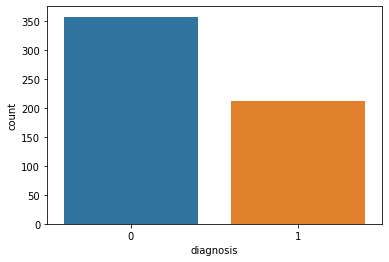

In [11]:
sns.countplot(x=dataset['diagnosis'],label="Count")

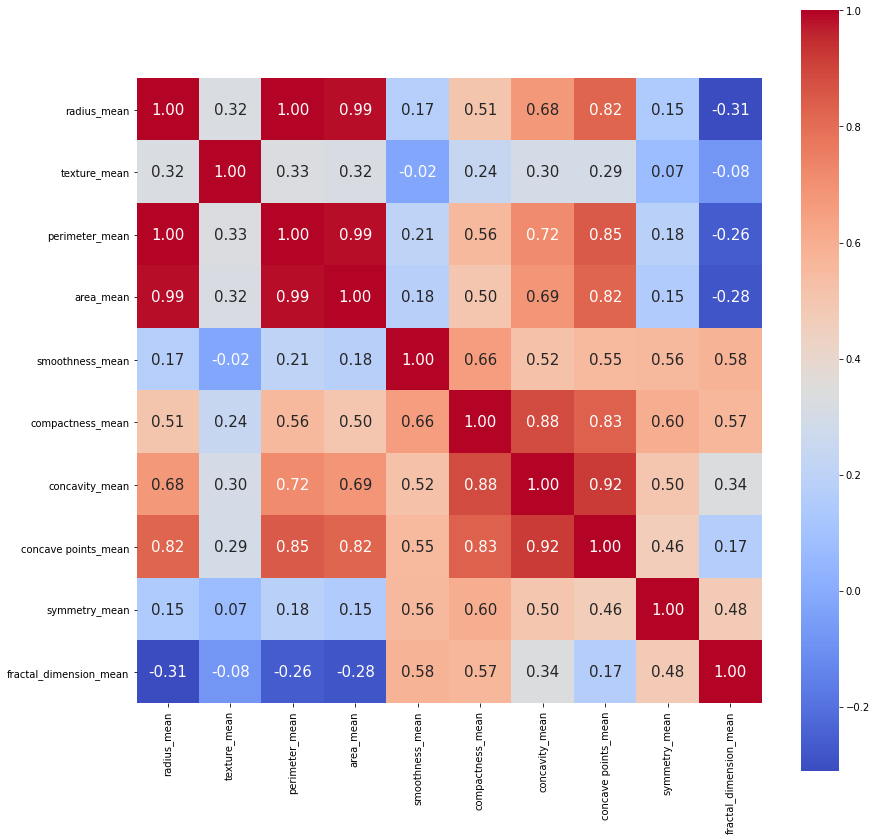

In [12]:
corr = dataset[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.25, random_state = 1)

In [14]:
X_train = train[prediction_var]# taking the training data input 
Y_train=train.diagnosis# This is output of our training data
# same we have to do for test
X_test= test[prediction_var] # taking test data inputs
Y_test =test.diagnosis   #output value of test dat
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("Logistic Regression\nConfusion matrix:")
print(cm)
print("Accuracy: ")
print((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,1]+cm[1,1]))

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("\nK Neighbors Classifier\nConfusion matrix:")
print(cm)
print("Accuracy: ")
print((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,1]+cm[1,1]))

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("\nSupport Vector Machine (linear)\nConfusion matrix:")
print(cm)
print("Accuracy: ")
print((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,1]+cm[1,1]))

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("\nSupport Vector Machine (rbf)\nConfusion matrix:")
print(cm)
print("Accuracy: ")
print((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,1]+cm[1,1]))

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("\nGaussian Naive Bayesian\nConfusion matrix:")
print(cm)
print("Accuracy: ")
print((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,1]+cm[1,1]))

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("\nDecision Tree Classifier\nConfusion matrix:")
print(cm)
print("Accuracy: ")
print((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,1]+cm[1,1]))

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print("\nRandom Forest Classifier\nConfusion matrix:")
print(cm)
print("Accuracy: ")
print((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,1]+cm[1,1]))


Logistic Regression
Confusion matrix:
[[83  5]
 [ 8 47]]
Accuracy: 
0.7142857142857143

K Neighbors Classifier
Confusion matrix:
[[83  5]
 [ 8 47]]
Accuracy: 
0.7142857142857143

Support Vector Machine (linear)
Confusion matrix:
[[83  5]
 [ 7 48]]
Accuracy: 
0.7119565217391305

Support Vector Machine (rbf)
Confusion matrix:
[[84  4]
 [10 45]]
Accuracy: 
0.7247191011235955

Gaussian Naive Bayesian
Confusion matrix:
[[85  3]
 [ 8 47]]
Accuracy: 
0.7252747252747253

Decision Tree Classifier
Confusion matrix:
[[81  7]
 [10 45]]
Accuracy: 
0.7078651685393258

Random Forest Classifier
Confusion matrix:
[[84  4]
 [10 45]]
Accuracy: 
0.7247191011235955
